In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Testing on synthetic data

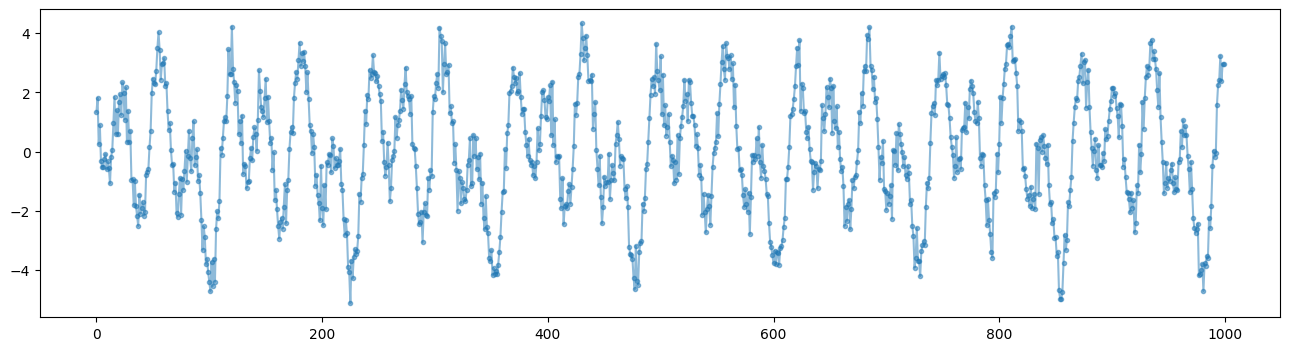

In [9]:
def generate_periodic_timeseries(N, T):
    """
    Generate N periodic time series of length T
    """
    res = []
    for i in range(N):
        tres = []
        for j in range(T):
           tres.append(np.sin(j/20)+np.cos(j/10)*1.5-np.sin(j/5+i)*2 + np.random.normal(loc=0, scale=0.5))
        res.append(tres)
    return np.array(res)

def draw(series):
    plt.figure(figsize=(16, 4))
    for i in range(len(series)):
        plt.plot(series[i], alpha=0.5, marker='.')
    plt.show()

X = generate_periodic_timeseries(1, 1000)
draw(X)

In [10]:
from keras.layers import Dense, Activation, Flatten
from keras.layers import LSTM
from keras.models import Sequential
import datetime
from sklearn.metrics import mean_squared_error

In [16]:
X = X[0]

window_size = 50
series = []

# Create the sliding window
for i in range(len(X) - window_size):
    series.append(X[i:i+window_size+1])

# Convert the list into a numpy array
series = np.array(series)

print(series.shape)

(950, 51)


In [25]:
import numpy as np
from sklearn.utils import shuffle

# Assuming X is your data and already a numpy array
nrow = round(0.8 * X.shape[0])

# Split the data into training and testing sets
train = series[:nrow, :]
test = series[nrow:, :]

# Shuffle the training data
train = shuffle(train)

# Discard the last value for inputs and use it for targets
train_X = train[:, :-1]
train_y = train[:, -1]
test_X = test[:, :-1]
test_y = test[:, -1]

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(800, 50)
(800,)
(150, 50)
(150,)


In [26]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)
print(train_X.shape)
print(test_X.shape)

(800, 50, 1)
(150, 50, 1)


In [27]:
model = Sequential()
model.add(LSTM(units=256, input_shape = (50,1), return_sequences = True))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/home/sizzziy/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,801 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,993 (1.06 MB)

 Trainable params: 276,993 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
t1 = datetime.datetime.now()
history = model.fit(train_X, train_y, batch_size=128, epochs=10, validation_split=0.1)
t2 = datetime.datetime.now()
print("Compilation Time : ", t2-t1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 2.5963 - val_loss: 1.3716
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 1.0715 - val_loss: 0.8181
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.7045 - val_loss: 0.4911
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.4915 - val_loss: 0.3303
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.4293 - val_loss: 0.2617
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.3419 - val_loss: 0.2814
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 0.3835 - val_loss: 0.2375
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.3491 - val_loss: 0.2241
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.3507 - val_loss: 0.2204
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.3125 - val_loss: 0.2070
Compilation Time :  0:00:11.683790


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


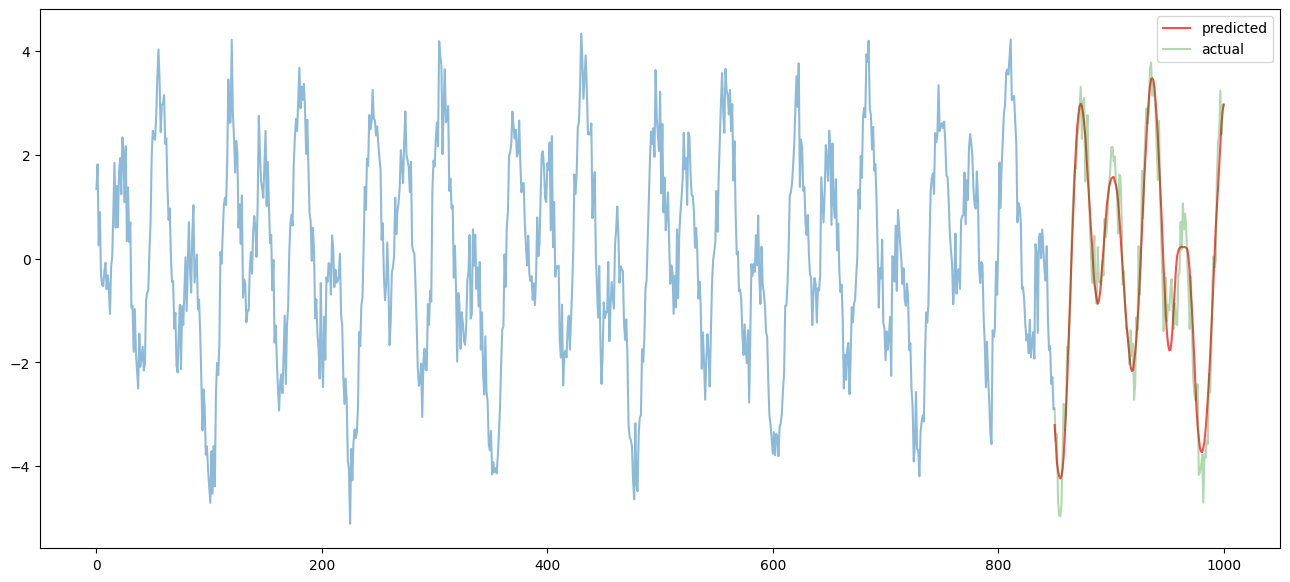

In [33]:
preds = model.predict(test_X).T
actual = test_y.reshape(1, -1)

begin = series.T[0]

plt.figure(figsize=(16, 7))
plt.plot(X[:-150], alpha=0.5)
plt.plot(np.linspace(850, 1000, 150), preds.reshape(150), color='red', label='predicted', alpha=0.7)
plt.plot(np.linspace(850, 1000, 150), actual.reshape(150), color='green', label='actual', alpha=0.3)
plt.legend()
plt.show()

0.3257660098178181


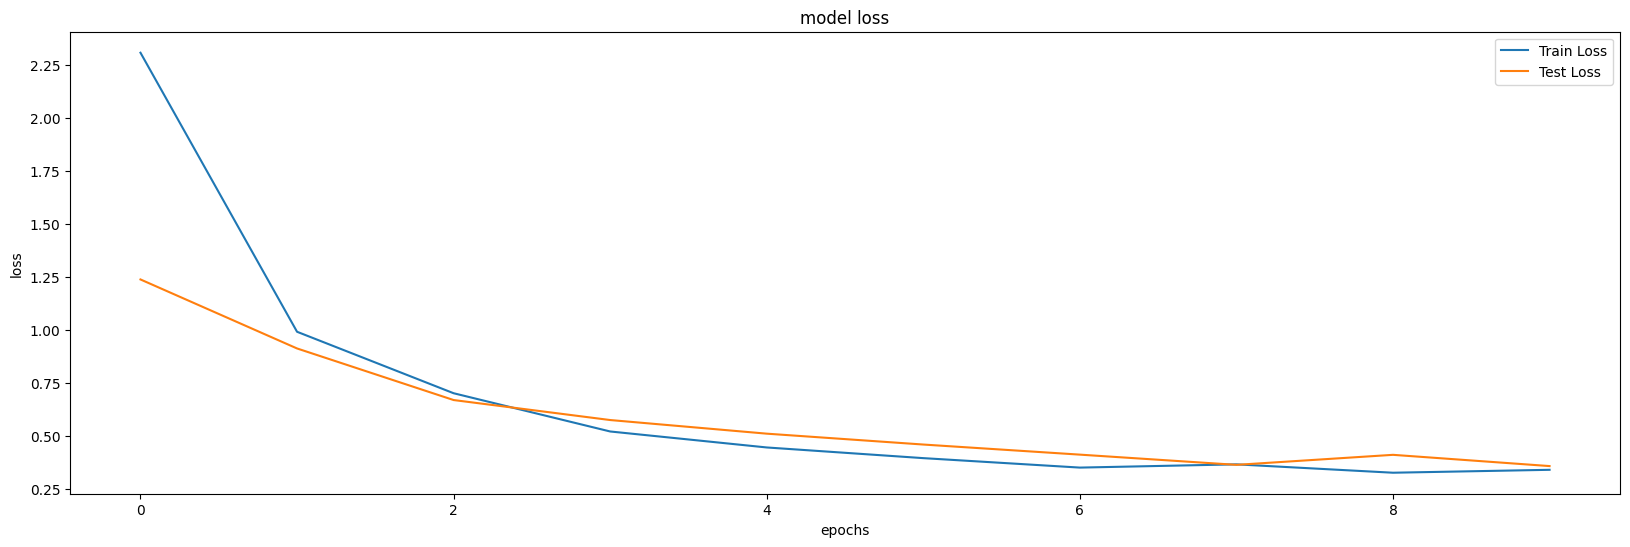

In [215]:
rmse_error = mean_squared_error(actual, preds)
print(rmse_error)
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()